# Introduction to Scikit-Learn (sklearn)

what we're going to cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimater/algorithm for our problems 
3. Fit the models/algorthms and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load  a trained model
7. Putting it all together 

## 0. And end-to-end scikit-learn workflow

In [1]:
# 1.Get the data ready
import pandas as pd
import numpy as np
heart = pd.read_csv('data/heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (feature matrix) 
X = heart.drop('target',axis=1)

#Create Y (labels)
Y = heart.target

In [4]:
# 2. Choose the right model and hyperparameters
from  sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.Fit the model to the training data 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=(0.2))

In [6]:
clf.fit(X_train,Y_train);

In [7]:
# to ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [8]:
# make a prediction 
y_preds =clf.predict(heart[0:1].drop('target',axis=1));
y_preds
# len(heart[0:1].columns)

array([1], dtype=int64)

In [9]:
y_preds = clf.predict(X_test)

In [10]:
y_preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [11]:
Y_test

173    0
253    0
300    0
209    0
279    0
      ..
270    0
219    0
149    1
112    1
58     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4.Evaluating the model on the training data
clf.score(X_train, Y_train)

1.0

In [13]:
clf.score(X_test, Y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(Y_test, y_preds)

array([[23,  6],
       [ 4, 28]], dtype=int64)

In [16]:
accuracy_score(Y_test, y_preds)

0.8360655737704918

In [17]:
# 5.Improve the model 
# Try different amount of n_estimators
np.random.seed(42)
for i in range(1,200,10):
    print(f"Trying model with different {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    # y_preds = clf.predict(X_test)
    print(f'score : {clf.score(X_test, Y_test)*100:.2f}%')

Trying model with different 1 estimators...
score : 77.05%
Trying model with different 11 estimators...
score : 85.25%
Trying model with different 21 estimators...
score : 88.52%
Trying model with different 31 estimators...
score : 83.61%
Trying model with different 41 estimators...
score : 90.16%
Trying model with different 51 estimators...
score : 83.61%
Trying model with different 61 estimators...
score : 88.52%
Trying model with different 71 estimators...
score : 90.16%
Trying model with different 81 estimators...
score : 88.52%
Trying model with different 91 estimators...
score : 85.25%
Trying model with different 101 estimators...
score : 86.89%
Trying model with different 111 estimators...
score : 88.52%
Trying model with different 121 estimators...
score : 91.80%
Trying model with different 131 estimators...
score : 86.89%
Trying model with different 141 estimators...
score : 88.52%
Trying model with different 151 estimators...
score : 86.89%
Trying model with different 161 est

In [18]:
# 6. Save the model and load it
clf = RandomForestClassifier(n_estimators=83).fit(X_train,Y_train)
import pickle 
pickle.dump(clf,open("random_forst_model_1.pkl", "wb")) # write binaries

In [19]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb")) # read binaries
loaded_model.score(X_test,Y_test)

0.8524590163934426

In [20]:
import sklearn
sklearn.__version__

'1.4.2'

In [21]:
sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\Nitin\miniconda3\envs\env\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.2
          pip: 24.0
   setuptools: 69.5.1
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Nitin\miniconda3\envs\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 6
threading_layer: intel

       filepath: C:\Users\Nitin\miniconda3\envs\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


## 1. Getting our data ready
### 1.1 Make sure it's all Numerical

In [22]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into X/y
X = car_sales.drop("Price",axis = 1)
y = car_sales["Price"]

#Split into training and testing sets

x_train, x_test, y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [26]:
#Build a Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [27]:
# converting the nominal categorical data to numerical form
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([(
    'trans1', ohe,['Make','Colour'] )],remainder="passthrough")

In [28]:
x_trans_train = transformer.fit_transform(x_train
                                         )
x_trans_test = transformer.fit_transform(x_test)

In [29]:
model.fit(x_trans_train,y_train);

In [30]:
model.score(x_trans_test,y_test)

0.2742554372425341

In [31]:
x_train = pd.DataFrame(x_trans_train)
x_test = pd.DataFrame(x_trans_test)
np.random.seed(42)

In [32]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
model.score(x_test,y_test)

0.27464013550660915

### 1.2 what if there were missing values
1. fill them with some value(also know as imputation )
2. Remove the samples with missing data altogether

In [34]:
car_sales_missing = pd.read_csv('./data/car-sales-missing-data.csv')
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [35]:
# create X and y
X = car_sales_missing.drop(columns='Price')
y = car_sales_missing.Price

In [36]:
x_trans = transformer.fit_transform(X)
x_trans[:3]
sklearn.__version__ # updated version of sklearn handles nan values 

'1.4.2'

### option 1. Fill missing values with pandas

In [37]:
car_sales_missing.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [38]:
def convert_price(price):
    # Remove the dollar sign and comma, then convert to integer
    price = str(price)
    pri = price.replace('$', '').replace(',' , '')
    pri = float(pri)
    return pri

# Apply the function to the 'price' column
car_sales_missing['Price'] = car_sales_missing['Price'].apply(convert_price)

In [39]:
car_sales_missing.Make.fillna("missing", inplace = True)
car_sales_missing.Colour.fillna("missing",inplace=True)
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean(),inplace=True)
car_sales_missing.Doors.fillna(4,inplace=True)
car_sales_missing.Price.fillna(car_sales_missing.Price.mean(),inplace=True)
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [40]:
X = car_sales_missing.drop(columns='Price')
y = car_sales_missing.Price
X_trans = transformer.fit_transform(X)

In [41]:
x_train, x_test,  y_train, y_test = train_test_split(X_trans,y,test_size= 0.2)

In [42]:
model.fit(x_train,y_train);

In [43]:
model.score(x_test, y_test)

0.04689812244897962

### option 2. Remove rows

In [44]:
car_sales_missing = pd.read_csv('./data/car-sales-missing-data.csv')
car_sales_missing.dropna(inplace= True)

In [45]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [46]:
def convert_price(price):
    # Remove the dollar sign and comma, then convert to integer
    price = str(price)
    pri = price.replace('$', '').replace(',' , '')
    pri = float(pri)
    return pri

# Apply the function to the 'price' column
car_sales_missing['Price'] = car_sales_missing['Price'].apply(convert_price)
X = car_sales_missing.drop(columns='Price')
y = car_sales_missing.Price
X_trans = transformer.fit_transform(X)

In [47]:
x_train, x_test,  y_train, y_test = train_test_split(X_trans,y,test_size= 0.2)

In [48]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
model.score(x_test, y_test)

nan

### 1.3. Inputing

In [50]:
# filling missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill the categorical values with 'missing' and numerical values with mean
cat_imp = SimpleImputer(strategy= 'constant',fill_value='missing')
door_imp = SimpleImputer(strategy='constant', fill_value = 4)
num_imp = SimpleImputer(strategy = 'mean')

# define columns 
cat_features  = [ 'Make','Colour']
door_features = ['Doors']
num_features = ['Odometer']

# transformer
transformer = ColumnTransformer([
    ('cat', cat_imp, cat_features),
    ('door', door_imp,door_features),
    ('num', num_imp, num_features)
    ], remainder = "passthrough")

In [51]:
car_sales_missing = pd.read_csv('./data/car-sales-missing-data.csv')
X = car_sales_missing.drop(columns = "Price")
y = car_sales_missing.Price
X

,Make,Colour,Odometer,Doors
0,Toyota,White,150043.0,4.0
1,Honda,Red,87899.0,4.0
2,Toyota,Blue,NaN,3.0
3,BMW,Black,11179.0,5.0
4,Nissan,White,213095.0,4.0
5,Toyota,Green,NaN,4.0
6,Honda,NaN,NaN,4.0
7,Honda,Blue,NaN,4.0
8,Toyota,White,60000.0,NaN
9,NaN,White,31600.0,4.0


In [52]:
x = transformer.fit_transform(X)

In [54]:
X = pd.DataFrame(x)
price_imp  = SimpleImputer(strategy="constant", fill_value=0)
trans = ColumnTransformer([
    ('ytrans', cat_imp, 'Price')],remainder="passthrough")
y = pd.DataFrame(columns=['Price'],data = y)
# y = trans.fit_transform(y)
y

,Price
0,"$4,000"
1,"$5,000"
2,"$7,000"
3,"$22,000"
4,"$3,500"
5,"$4,500"
6,"$7,500"
7,NaN
8,NaN
9,"$9,700"


## 2. Choosing the right estimator/algorithm for your problem
some things to note:
* sklearn referes to machine learning models, algorithms as estimators
* classification problem - predicting a category (heart disease or not)
      * sometimes you'll see 'clf' (short for classifier) used as  a classification estimator
* Regression problem - predicting a number(selling price ) 

### 2.1 Picking a machine learning model for a regression problem
let's use California  housing data sets

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing

In [ ]:
housing_df = pd.DataFrame(housing['data'], columns = housing.feature_names)
housing_df

In [ ]:
housing_df['target']  = housing['target']
housing_df.head()

In [ ]:
housing_df.isna().sum()

In [ ]:
# import algorithm

# set up random seed
np.random.seed(42)

#create the data
X = housing_df.drop(columns = 'target')
y = housing_df.target

# split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#instantiate and fit the model 
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
reg = linear_model.LassoLars(alpha = .1)
reg.fit(x_train, y_train)

In [ ]:
reg.score(x_test, y_test)

In [ ]:
# import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=120)
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

### 2.2 Picking a ml algorithm for classification

In [ ]:
np.random.seed(42)
heart = pd.read_csv('./data/heart-disease.csv')
heart.head()

In [ ]:
len(heart)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X = heart.drop(columns= "target")
y = heart.target
clf = svm.SVC()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train,y_train)

In [ ]:
neigh.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=10).fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter= 1000,random_state=12, tol=1e-5)
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

Tidbit:

        1. if u have structured data use ensemble models
        2. if u have unstructured data use deep learning or transfer learning

## 3. fit the model on our data and use it to make predictions


### 3.1 fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = lablels, targets, target variables 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart = pd.read_csv('./data/heart-disease.csv')
X = heart.drop(columns = 'target')
y = heart.target
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=80)

# fit the model(training the model on our data)
clf.fit(x_train,y_train)

# Evaluate the model(use the patterns the model has learnt )
clf.score(x_test, y_test)

### 3.2 Make predictions using our ml model
2 ways to make predictions
1. `predict()`
2. `predict_proba()`

In [ ]:
# use a trained model to make predictions 
y_preds = clf.predict(x_test)
y_preds

In [ ]:
np.array(y_test)

In [ ]:
np.mean(y_test == y_preds)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

 Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:6])

In [ ]:
clf.predict(x_test[:6])

In [ ]:
y_test[:6]

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df.head()

In [ ]:
housing_target= pd.DataFrame(housing.target, columns = ['MedHouseVal'])
housing_target.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X  = housing_df
y = housing_target
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
regr = RandomForestRegressor(n_estimators = 100)
regr.fit(x_train, y_train)

In [ ]:
regr.score(x_test, y_test)

In [ ]:
y_pred = regr.predict(x_test)
y_pred

In [ ]:
y_test = np.array(y_test)

In [ ]:
# compare the predictions with the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)

## 4. Evaluating the model
Three ways to evaluate Scikit-Learn model/estimators
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
   you can read more about these here : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with `score()` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
heart = pd.read_csv('./data/heart-disease.csv')
X= heart.drop(columns = 'target')
y = heart['target']
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
clf = RandomForestRegressor(n_estimators=100)

In [ ]:
y = housing.target
x_train, x_test, y_train, y_test = train_test_split(housing_df, y , test_size=.2)

In [ ]:
rg = RandomForestRegressor(n_estimators=200)
rg.fit(x_train, y_train)

In [ ]:
rg.score(x_train, y_train)

In [ ]:
rg.score(x_test, y_test)

#### `rg.score()` returns the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

### 4.2 Evaluating a model using a `scoring` parametexr 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
heart = pd.read_csv('./data/heart-disease.csv')
X= heart.drop(columns = 'target')
y = heart['target']
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train);

In [3]:
clf.score(x_test,y_test)

0.8524590163934426

In [4]:
cross_val_score(clf,X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [5]:
np.random.seed(42)
# single training and test split score
clf_single_score = clf.score(x_test, y_test,)

# take the mean of 5-fold cross-validation score 
clf_cross_val_score = np.mean(cross_val_score(clf,X, y, cv = 5))


# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [6]:
# default scoring parameter of classifier = mean accuracy
# scoring parameter set to None by default 
cross_val_score(clf, X, y, cv = 5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluatioin metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification matrix

In [7]:

heart = pd.read_csv('./data/heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)


X= heart.drop(columns = 'target')
y = heart['target']
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=.2)

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf,X, y  , cv = 5)

In [9]:
np.mean(cross_val_score)

0.8215300546448088

In [10]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.15%


**Area under the reciever operating characteristic curve (AUC/ROC)**
* Area under curve(AUC)
* ROC curve
  Roc curves are a comparison of a model's true positive rate (tpr) versus a models false postive rate(fpr)
  * True positive = model predicts `1` when truth is `1`
  * False positve = model precicts `1` when truth is `0`
  * True negative = model predicts `0` when truth is `0`
  * False negative = model predicts `0` when truth is `1`

In [11]:
from sklearn.metrics import roc_curve 
# make predictions with probabilities
clf.fit(x_train, y_train)
y_probs = clf.predict_proba(x_test)
y_probs[:5], len(y_test)
# roc_curve

(array([[0.94, 0.06],
        [0.42, 0.58],
        [0.51, 0.49],
        [0.89, 0.11],
        [0.23, 0.77]]),
 61)

In [12]:
y_prob_positive = y_probs[:, 1:]
y_prob_positive[:5]

array([[0.06],
       [0.58],
       [0.49],
       [0.11],
       [0.77]])

In [13]:
#calculate fpr, tpr, and thresholds
fpr , tpr , thresholds = roc_curve(y_test, y_prob_positive)

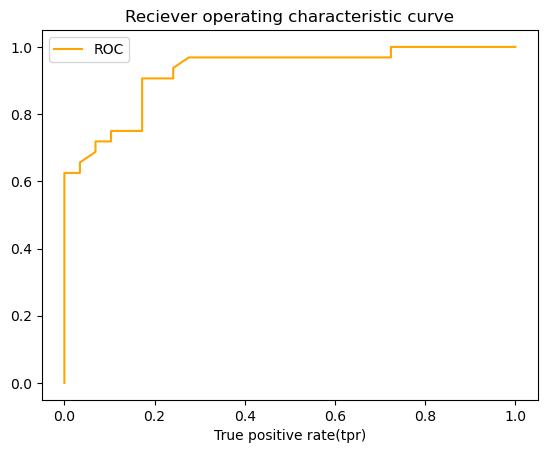

In [14]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr) and true positive rate(tpr) of a model .
    """
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # plot line with no predictive power (baseline)
    # plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--" , label = "Guessing")

    # customize the plot 
    plt.xlabel("False positive rate(fpr)")
    plt.xlabel("True positive rate(tpr)")
    plt.title("Reciever operating characteristic curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)

0.9267241379310345

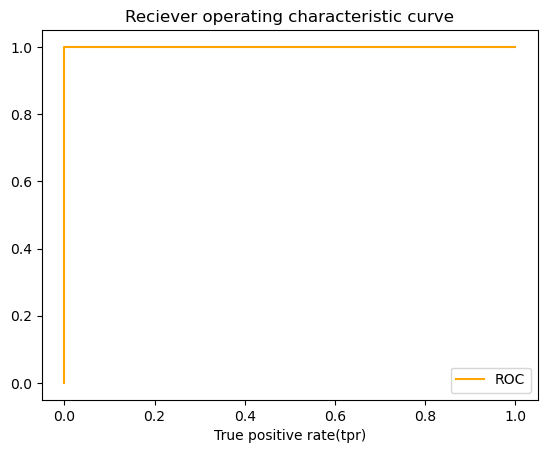

In [16]:
# plot perfect roc curve and auc score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [17]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix  is a quick way to compare the labels a model predicts labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [18]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [19]:
# visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames = ["Actual labels"],
            colnames = ["Predicted labels"]
           )

Predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


In [28]:
24+5+5+27, len(y_test)

(61, 61)

In [21]:
# how to install a conda package into the current environment from a JUPYTER Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



<Axes: >

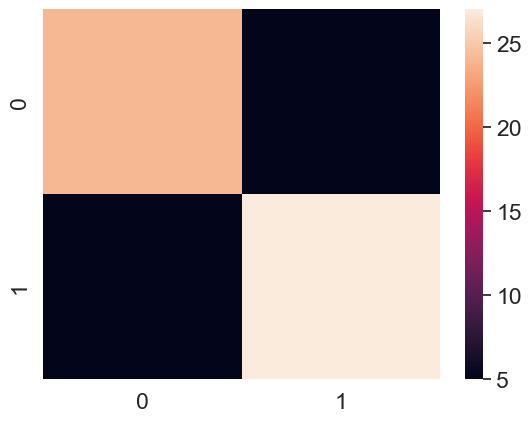

In [30]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

#create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat)


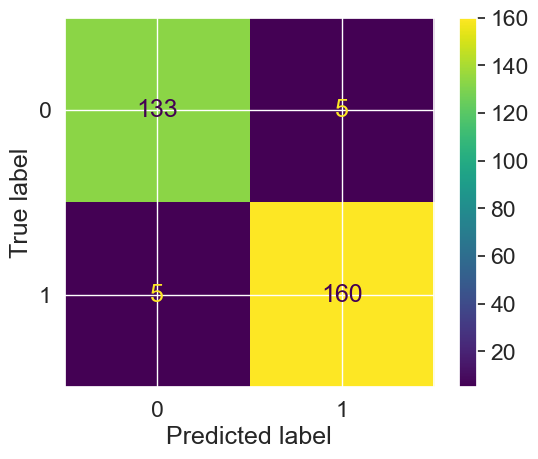

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf, X = X, y = y);

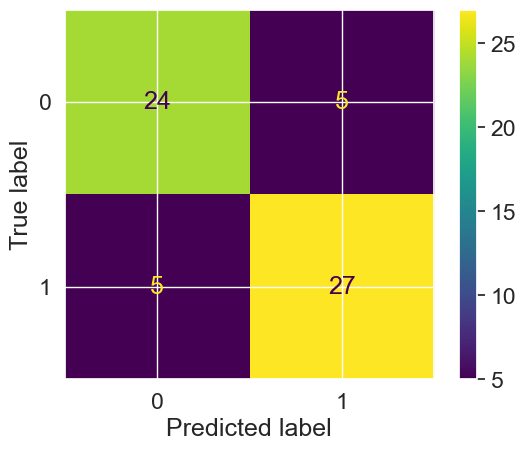

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

**Classification Report**

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:
1. R^2 (pronounced r-squared ) or coeffecient of determination
2. Mean absolute error(MAE)
3. Mean squared error (MSE)
   
**R^2**

What R-squared does: Compares your model predictions to the mean of the targets. Values can range from negative infinity(  a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
y = housing.target
x_train, x_test, y_train, y_test = train_test_split(housing_df, y , test_size=.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
model.score(x_test, y_test)

0.8173976900390889

In [38]:
y_test.mean()

2.0606782969961244

In [40]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [49]:
r2_score(y_test, model.predict(x_test))

0.8173976900390889

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [53]:
#MAE
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.32561677231104674

In [70]:
np.abs(y_pred-y_test).mean()

0.32561677231104674

In [75]:
df = pd.DataFrame(data = {"actual values" : y_test, 
                          "predicted values" : y_pred})
df["differences"] = abs(df["predicted values"] - df["actual values"])
df.head()

,actual values,predicted values,differences
0,0.974,1.18756,0.21356
1,2.813,2.05356,0.75944
2,1.324,1.53748,0.21348
3,0.866,1.15604,0.29004
4,3.029,1.69744,1.33156


**Mean Squared Error(MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [76]:
df["squared differences"] = (df["predicted values"] - df["actual values"])**2
df.head()

,actual values,predicted values,differences,squared differences
0,0.974,1.18756,0.21356,0.045608
1,2.813,2.05356,0.75944,0.576749
2,1.324,1.53748,0.21348,0.045574
3,0.866,1.15604,0.29004,0.084123
4,3.029,1.69744,1.33156,1.773052


In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.2488133239853802

In [77]:
squared = np.square(df["differences"])
squared.mean()

0.2488133239853802

In [81]:
df_mse = df.copy()
df_mse.iloc[0]['squared differences'] = 16
df_mse.head()

C:\Users\Nitin\AppData\Local\Temp\ipykernel_4232\2418797249.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_mse.iloc[0]['squared differences'] = 16


,actual values,predicted values,differences,squared differences
0,0.974,1.18756,0.21356,16.000000
1,2.813,2.05356,0.75944,0.576749
2,1.324,1.53748,0.21348,0.045574
3,0.866,1.15604,0.29004,0.084123
4,3.029,1.69744,1.33156,1.773052


In [82]:
# calculate MSE with large error
df_mse['squared differences'].mean()

0.252678244558636

### 4.2.3 Finally using the `scoring` parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart.drop('target', axis = 1)
y = heart.target
clf = RandomForestClassifier(n_estimators=100)

In [87]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y , cv = 5, scoring = None) # if scoring is none estimator default scoring will be used which in this case is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [88]:
# cross_-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [89]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [90]:
# cross_-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [92]:
# precision
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_acc

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [96]:
# cross_-validated precision
print(f"The cross-validated precision is : {np.mean(cv_acc)}%")

The cross-validated precision is : 0.8545454545454545%


In [94]:
# recall
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_acc

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [97]:
# cross_-validated recall
print(f"The cross-validated recall is : {np.mean(cv_acc)}%")

The cross-validated recall is : 0.8545454545454545%


let's see the `scoring` parameter being used for a regression problem.. (`higher the value the better`)

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = housing_df
y = housing.target
rg = RandomForestRegressor()
# mean sqaured error
cv_mse = cross_val_score(rg,X, y, scoring='neg_mean_squared_error', cv = 3)

In [112]:
# r^2 score
cv_r2 = cross_val_score(rg, X, y, cv = 3)

In [113]:
# mean absolute error
cv_mas = cross_val_score(rg, X, y,scoring='neg_mean_absolute_error',cv=3)

In [114]:
cv_mse

array([-0.51017222, -0.33368897, -0.5403795 ])

In [115]:
cv_r2

array([0.61564428, 0.72247659, 0.62291024])

In [116]:
cv_mas

array([-0.5173712 , -0.4219676 , -0.50676033])

### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn ml models/estimators is to using the `sklearn.metrics` module- https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart.drop('target',axis= 1)
y = heart.target

x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

[   
      accuracy_score(y_test,y_pred,),
     precision_score(y_test,y_pred,),
        recall_score(y_test,y_pred,),
            f1_score(y_test,y_pred,)
]


[0.8524590163934426, 0.8484848484848485, 0.875, 0.8615384615384616]

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df
y = housing.target 

x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

rg = RandomForestRegressor()
rg.fit(x_train, y_train)
y_pred = rg.predict(x_test)

[
    r2_score( y_test, y_pred),
    mean_absolute_error( y_test, y_pred),
    mean_squared_error( y_test, y_pred),
]

[0.8190500685323359, 0.3193555153343025, 0.2322705263182068]

In [148]:
[
r2_score( y_test, y_pred,),
mean_absolute_error( y_test, y_pred,),
mean_squared_error( y_test, y_pred,),
]

[0.8190500685323359, 0.3193555153343025, 0.2322705263182068]

## 5 Improving the model

First predictions = baseline predictions
First model = baseline model.

From a data perspective:
* Could we collect more data?(generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [163]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [164]:
clf.max_depth = 2

In [165]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets:  training , `validation` and test

In [166]:
clf.get_params() # baseline parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`

In [184]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy,2),
                    "precision" : round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1" : round(f1,2)}
    print(f"Accuracy : {accuracy*100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    return metric_dict

In [209]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# shuffle the data
heart_disease = heart.sample(frac=1)

# split into X and y
X = heart_disease.drop('target',axis =1 )
y = heart_disease.target

t = round(0.7*len(heart_disease))
v = round(t+ 0.15*len(heart_disease))

x_train, x_valid, x_test = X[:t], X[t:v], X[v:]
y_train, y_valid, y_test = y[:t], y[t:v], y[v:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make baseline predictions
y_preds = clf.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy : 82.22%
Precision : 0.81
Recall: 0.88
F1 score : 0.85


In [210]:
np.random.seed(42)
# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy : 82.22%
Precision : 0.84
Recall: 0.84
F1 score : 0.84


### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [212]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5,10,20,30],
        "max_features" : ["auto", "sqrt"],
        'min_samples_split' : [2,4,6],
        "min_samples_leaf" : [1,2,4]
       }

np.random.seed(42)

# split into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

# split into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter = 10, # no of models to try
                            cv  = 5, 
                            verbose = 2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [214]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [215]:
# make predictions with the best hyperparameters

rs_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_preds)

Accuracy : 82.61%
Precision : 0.84
Recall: 0.84
F1 score : 0.84


### 5.3 Hyperparameter tuning with GridSearchCV

In [216]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [217]:
grid_2 = {"n_estimators" : [10, 100, 200, 500],
        "max_depth" : [None],
        "max_features" : ["auto", "sqrt"],
        'min_samples_split' : [6],
        "min_samples_leaf" : [1,2]
       }

In [218]:
from sklearn.model_selection import GridSearchCV 
np.random.seed(42)

# split into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

# split into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSaerchCV
gs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid_2,                            
                            cv  = 5, 
                            verbose = 2)

# fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_est

C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nitin\miniconda3\envs\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [6],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=2)

In [219]:
gs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [220]:
gs_pred = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test,gs_pred)

Accuracy : 82.61%
Precision : 0.84
Recall: 0.84
F1 score : 0.84


Let's compare our different models metrics.

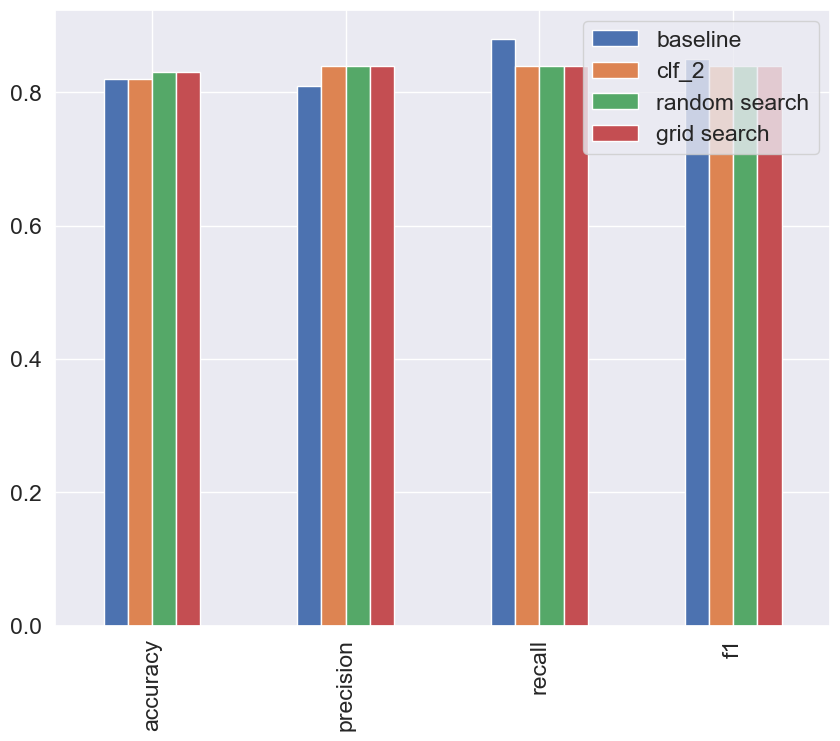

In [221]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize = (10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load ml models:
1. With Python's  `pickle` module
2. With the `joblib` module



**Pickle**

In [235]:
import pickle 

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [236]:
# laod a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [237]:
pickle_pred = loaded_pickle_model.predict(x_test)
pickle_metrics = evaluate_preds(y_test, pickle_pred)

Accuracy : 82.61%
Precision : 0.84
Recall: 0.84
F1 score : 0.84


**Joblib**

In [242]:
from joblib import dump,load

# Save model to file
dump(gs_clf, filename="./models/gs_random_forest_model_1.joblib")

['./models/gs_random_forest_model_1.joblib']

In [245]:
# Import a saved joblib model
loaded_job_model = load(filename="./models/gs_random_forest_model_1.joblib")

In [246]:
job_pred = loaded_job_model.predict(x_test)
job_metrics = evaluate_preds(y_test, job_pred)

Accuracy : 82.61%
Precision : 0.84
Recall: 0.84
F1 score : 0.84


## 7. Putting it all together!

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/car-sales-extended-missing-data.csv")

In [17]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [18]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill  missing data
2. Convert data to numbers
3. Build a ml model on data

In [24]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import train_test_split

# setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('./data/car-sales-extended-missing-data.csv')
data.dropna(subset = ['Price'], inplace = True)

# define different features and transformer pipleine
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'constant',fill_value='missing')),
     ('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'mean'))
])

# setup preprocessing steps (fill missing values , then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        ('door', door_transformer, door_features),
        ('num', numeric_transformer, numeric_features)
    ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps = [
    ("preprcessor", preprocessor),
    ('model', RandomForestRegressor())])

#split data
X = data.drop('Price', axis = 1)
y = data.Price
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875